In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [223]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [224]:
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [225]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
ID        107833 non-null object
DATOP     107833 non-null object
FLTID     107833 non-null object
DEPSTN    107833 non-null object
ARRSTN    107833 non-null object
STD       107833 non-null object
STA       107833 non-null object
STATUS    107833 non-null object
AC        107833 non-null object
target    107833 non-null float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [226]:
def points(row):
    return row.replace("." , ":")

In [227]:
train.STA = train.STA.apply(points)
test.STA = test.STA.apply(points)

In [228]:
train.DATOP = train.DATOP.replace("." , ":")
train.STD = train.STD.replace("." , ":")
train.STA = train.STA.replace("." , ":")

In [229]:
test.STA = test.STA.replace("." , ":")

In [230]:
test.DATOP = pd.to_datetime(test.DATOP)
test.STD = pd.to_datetime(test.STD)
test.STA = pd.to_datetime(test.STA)

train.DATOP = pd.to_datetime(train.DATOP)
train.STD = pd.to_datetime(train.STD)
train.STA = pd.to_datetime(train.STA)

In [231]:
train['day'] = train.DATOP.dt.day
train['month'] = train.DATOP.dt.month
train['year'] = train.DATOP.dt.year

test['day'] = test.DATOP.dt.day
test['month'] = test.DATOP.dt.month
test['year'] = test.DATOP.dt.year

In [232]:
test['sta_hour'] = test.STA.dt.hour
test['sta_minute'] = test.STA.dt.minute

train['sta_hour'] = train.STA.dt.hour
train['sta_minute'] = train.STA.dt.minute

test['std_hour'] = test.STD.dt.hour
test['std_minute'] = test.STD.dt.minute

train['std_hour'] = train.STD.dt.hour
train['std_minute'] = train.STD.dt.minute

In [233]:
train['hr_sin_sta'] = np.sin(train['sta_hour']*(2.*np.pi/24))
train['hr_cos_sta'] = np.cos(train['sta_hour']*(2.*np.pi/24))
train['mn_sin_sta'] = np.sin(train['sta_minute']*(2.*np.pi/60))
train['mn_cos_sta'] = np.cos(train['sta_minute']*(2.*np.pi/60))

train['hr_sin_std'] = np.sin(train['std_hour']*(2.*np.pi/24))
train['hr_cos_std'] = np.cos(train['std_hour']*(2.*np.pi/24))
train['mn_sin_std'] = np.sin(train['std_minute']*(2.*np.pi/60))
train['mn_cos_std'] = np.cos(train['std_minute']*(2.*np.pi/60))

test['hr_sin_sta'] = np.sin(test['sta_hour']*(2.*np.pi/24))
test['hr_cos_sta'] = np.cos(test['sta_hour']*(2.*np.pi/24))
test['mn_sin_sta'] = np.sin(test['sta_minute']*(2.*np.pi/60))
test['mn_cos_sta'] = np.cos(test['sta_minute']*(2.*np.pi/60))

test['hr_sin_std'] = np.sin(test['std_hour']*(2.*np.pi/24))
test['hr_cos_std'] = np.cos(test['std_hour']*(2.*np.pi/24))
test['mn_sin_std'] = np.sin(test['std_minute']*(2.*np.pi/60))
test['mn_cos_std'] = np.cos(test['std_minute']*(2.*np.pi/60))

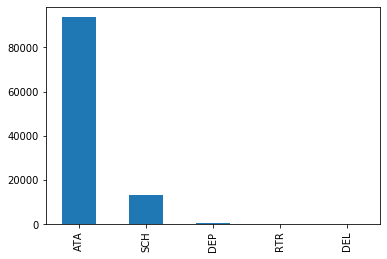

In [234]:
train.STATUS.value_counts().plot(kind = 'bar')

In [155]:
train.STATUS = np.where(train.STATUS == "ATA" , 1, 0)
test.STATUS = np.where(test.STATUS == "ATA" , 1, 0)

In [295]:
trainset.head()

,DEPSTN,ARRSTN,STATUS,AC,target,day,month,year,sta_hour,sta_minute,...,std_minute,hr_sin_sta,hr_cos_sta,mn_sin_sta,mn_cos_sta,hr_sin_std,hr_cos_std,mn_sin_std,mn_cos_std,airplane_city
0,Other,TUN,ATA,TU 32AIMN,260.0,3,1,2016,12,55,...,30,1.224647e-16,-1.000000e+00,-0.500000,8.660254e-01,0.500000,-0.866025,1.224647e-16,-1.000000,1
1,MXP,TUN,ATA,TU 31BIMO,20.0,13,1,2016,16,55,...,5,-8.660254e-01,-5.000000e-01,-0.500000,8.660254e-01,-0.707107,-0.707107,5.000000e-01,0.866025,1
2,TUN,IST,ATA,TU 32AIMN,0.0,16,1,2016,6,45,...,10,1.000000e+00,6.123234e-17,-1.000000,-1.836970e-16,0.866025,0.500000,8.660254e-01,0.500000,1
3,DJE,Other,ATA,TU 736IOK,0.0,17,1,2016,17,0,...,10,-9.659258e-01,-2.588190e-01,0.000000,1.000000e+00,-0.500000,-0.866025,8.660254e-01,0.500000,1
4,TUN,ALG,ATA,TU 320IMU,22.0,17,1,2016,15,50,...,30,-7.071068e-01,-7.071068e-01,-0.866025,5.000000e-01,-0.500000,-0.866025,1.224647e-16,-1.000000,1


In [125]:
['TUN', 'DJE', 'ORY', 'MIR', 'MRS', 'LYS', 'NCE', 'ALG', 'MXP', 'IST']

True

In [199]:
train['AC'].unique()

array(['TU 32AIMN', 'TU 31BIMO', 'TU 736IOK', 'TU 320IMU', 'TU 736IOP',
       'TU 32AIMH', 'TU 32AIMI', 'TU 32AIMC', 'TU 31AIMK', 'TU 32AIMF',
       'TU 32AIMP', 'TU 320IMR', 'TU 332IFN', 'TU 31AIMJ', 'TU 320IMT',
       'TU 736IOL', 'TU 31BIMQ', 'TU 736IOR', 'TU 320IMV', 'TU 320IMS',
       'TU 332IFM', 'TU 320IMW', 'TU 32AIML', 'TU 32AIMD', 'TU 32AIMM',
       'TU CR9ISA', 'TU 32AIMG', 'TU 736ION', 'TU 736IOM', 'TU 736IOQ',
       '5M 343SUN', 'UG AT7LBD', '5K 343TQY', 'UG AT7LBE', 'UG AT7AT7',
       'BJ 320INP', 'BJ 320INH', 'BJ 320INQ', 'BJ 320INA', 'UG CR9XXX',
       'UG CR9CR9', 'TU 32A32A', 'BJ 320INB', 'GJ 734CGC', 'QS 738TSC',
       'PS 738PSD', 'D4 319CQG', 'BJ 320INR', 'BJ 320INC', 'UJ 320TCF',
       '5K 345TFX', 'D4 320CQP', '5M 343JAI', 'GW 320MQH', 'UG CR9ISA',
       '6P M87TRJ', 'TU CR9CR9', 'TU CR9XXX', 'GJ 733EWE', 'GJ 734PGC',
       'GJ 733GGC', 'GJ 734MGC', 'GJ 733LGC', '5M 343FOX', 'BJ 320INO',
       'OL 321ABY', 'X9 320VEB', 'TU 320320'], dtype=object)

In [249]:
def extract_plan(row):
    return row.split(" ")[0]

In [253]:
train['airplane_city'] = train['AC'].apply(extract_plan)
test['airplane_city'] = test['AC'].apply(extract_plan)

In [254]:
train['airplane_city'] = np.where(train['airplane_city'] == 'TU', 1, 0)
test['airplane_city'] = np.where(test['airplane_city'] == 'TU', 1, 0)

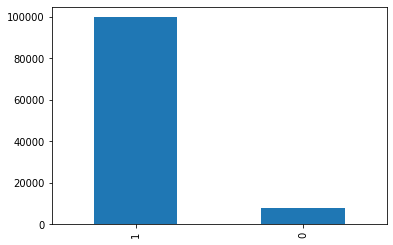

In [239]:
train['airplane_city'].value_counts().plot(kind = "bar")

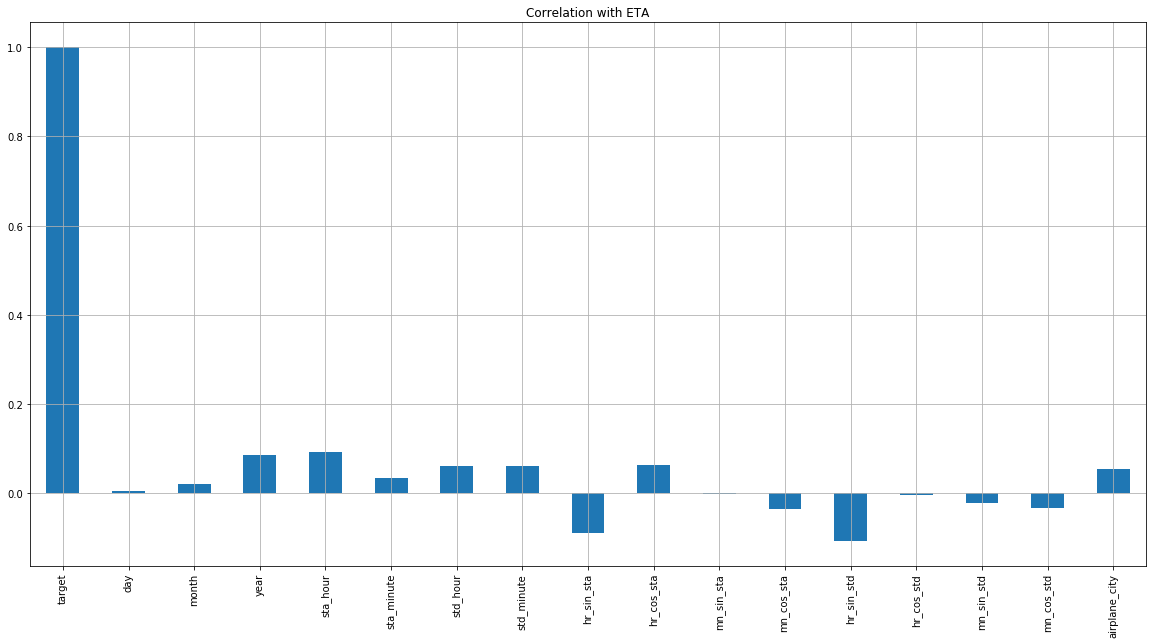

In [240]:
train.corrwith(train['target']).plot.bar(figsize = (20,10), grid = True, title = 'Correlation with ETA')

In [183]:
train.AC.astype(str).split(" ")[0].unique()

AttributeError: 'Series' object has no attribute 'split'

In [255]:
def city_other(row):
    if row not in ['TUN', 'DJE', 'ORY', 'MIR', 'MRS', 'LYS', 'NCE', 'ALG', 'MXP', 'IST']:
        return "Other"
    else:
        return row

In [256]:
test.DEPSTN = test.DEPSTN.apply(city_other)
train.DEPSTN = train.DEPSTN.apply(city_other)
test.ARRSTN = test.ARRSTN.apply(city_other)
train.ARRSTN = train.ARRSTN.apply(city_other)

In [257]:
test.DEPSTN.value_counts()

TUN      3621
Other    2681
DJE       926
ORY       574
MIR       522
MRS       243
NCE       192
LYS       191
ALG       129
MXP       129
IST       125
Name: DEPSTN, dtype: int64

In [293]:
trainset = train.drop(['ID' , 'DATOP' , 'FLTID' , 'STD' , 'STA'] , axis = 1)
testset = test.drop(['ID' , 'DATOP' , 'FLTID' , 'STD' , 'STA'] , axis = 1)

In [283]:
all_ = pd.concat([trainset.drop(['target'], axis = 1), testset])

In [284]:
all_data = pd.get_dummies(all_)

In [285]:
Xt = all_data.iloc[:trainset.shape[0],:]
Xts = all_data.iloc[trainset.shape[0]:,:]

In [303]:
trainset.head()

,DEPSTN,ARRSTN,STATUS,AC,target,day,month,year,sta_hour,sta_minute,...,std_minute,hr_sin_sta,hr_cos_sta,mn_sin_sta,mn_cos_sta,hr_sin_std,hr_cos_std,mn_sin_std,mn_cos_std,airplane_city
0,Other,TUN,ATA,TU 32AIMN,260.0,3,1,2016,12,55,...,30,1.224647e-16,-1.000000e+00,-0.500000,8.660254e-01,0.500000,-0.866025,1.224647e-16,-1.000000,1
1,MXP,TUN,ATA,TU 31BIMO,20.0,13,1,2016,16,55,...,5,-8.660254e-01,-5.000000e-01,-0.500000,8.660254e-01,-0.707107,-0.707107,5.000000e-01,0.866025,1
2,TUN,IST,ATA,TU 32AIMN,0.0,16,1,2016,6,45,...,10,1.000000e+00,6.123234e-17,-1.000000,-1.836970e-16,0.866025,0.500000,8.660254e-01,0.500000,1
3,DJE,Other,ATA,TU 736IOK,0.0,17,1,2016,17,0,...,10,-9.659258e-01,-2.588190e-01,0.000000,1.000000e+00,-0.500000,-0.866025,8.660254e-01,0.500000,1
4,TUN,ALG,ATA,TU 320IMU,22.0,17,1,2016,15,50,...,30,-7.071068e-01,-7.071068e-01,-0.866025,5.000000e-01,-0.500000,-0.866025,1.224647e-16,-1.000000,1


In [302]:
X = trainset.drop(['target'], axis = 1)
y = trainset.target

In [306]:
for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[c] = X[c].astype('category')

In [307]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y , test_size = 0.3 , random_state = 70)

In [289]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [290]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

119.36468308558597

In [108]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

C:\Users\MxcsYounes\.conda\envs\base_ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [109]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

125.33770960272689

In [171]:
from xgboost import XGBRegressor
reg = XGBRegressor(objective = 'reg:squarederror')
reg.fit(x_train, y_train)

C:\Users\MxcsYounes\.conda\envs\base_ml\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [172]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

118.49051186779668

In [308]:
from lightgbm import LGBMRegressor
reg = LGBMRegressor()
reg.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [309]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

115.8056650139635

In [310]:
for c in testset.columns:
    col_type = testset[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        testset[c] = testset[c].astype('category')

In [311]:
result = reg.predict(testset)

In [312]:
orders = test.ID
all_data = list(zip(orders, result.reshape(1,-1)[0].astype('float32')))

In [313]:
final_result = pd.DataFrame(all_data, columns=['ID', 'target'])
final_result.head()

,ID,target
0,test_id_0,18.627522
1,test_id_1,31.206568
2,test_id_2,26.132158
3,test_id_3,23.762527
4,test_id_4,31.905582


In [314]:
final_result[final_result['target']< 0]

,ID,target
739,test_id_739,-2.515370
1485,test_id_1485,-1.506166
2365,test_id_2365,-2.904915
2366,test_id_2366,-1.444460
2369,test_id_2369,-1.955027
...,...,...
9314,test_id_9314,-0.363644
9319,test_id_9319,-1.350937
9323,test_id_9323,-0.004695
9324,test_id_9324,-2.149774


In [181]:
def relu(x):
    return x * (x > 0)
final_result['target'] = final_result['target'].transform(relu).transform(np.abs)
final_result['target'] = final_result['target'].astype(float)

In [115]:
final_result.to_csv('first_tunis_air_3_lgbm_2.csv' , index = False)